# SupportVectorMachine

In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
infile = open("Modelling_dataset_train.pickle",'rb')
train = pickle.load(infile)
infile.close()

infile1 = open("Modelling_dataset_test.pickle",'rb')
test = pickle.load(infile1)
infile1.close()

# Data Splitting

In [3]:
Xtrain = train["Content_Parsed"]
Ytrain = train["Class Index"]
Xtest = test["Content_Parsed"]
Ytest = test["Class Index"]

In [4]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(Xtrain,
                                                    Ytrain,
                                                    test_size=0.9)

# Text Representations

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
features_train = tfidf.fit_transform(X_train)
labels_train = y_train

features_test = tfidf.transform(X_test)
labels_test = y_test


# Hyperparameter Tuning

### Using GridSearchCV

In [6]:
np.random.seed(42)
param_grid = {'kernel': ['linear','rbf', 'poly', 'sigmoid']}

rf2 = SVC()
# Use GridSearch
clf=GridSearchCV(rf2, param_grid)
# Fit the model
clf.fit(features_train, labels_train)






GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [7]:
clf.best_params_

{'kernel': 'rbf'}

In [8]:
clf.score(features_test, labels_test)

0.8871018518518519

In [9]:
clf.score(features_train, labels_train)

0.98375

# Evaluating our machine learing model beyond accuracy

In [11]:
y_preds = clf.predict(features_test)
y_preds

array([3, 3, 2, ..., 2, 2, 1], dtype=int64)

In [12]:
np.array(y_test)

array([3, 3, 2, ..., 2, 2, 1], dtype=int64)

### Confusion Matrix

In [13]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[23719,   965,  1285,  1034],
       [  376, 26081,   190,   369],
       [ 1081,   327, 22646,  2872],
       [ 1191,   389,  2114, 23361]], dtype=int64)

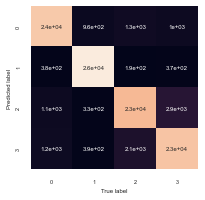

In [14]:
sns.set(font_scale=0.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    ### Classification Report
plot_conf_mat(y_test, y_preds)

In [15]:
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,1,2,3,4
Actual Labels,,,,
1,23719,965,1285,1034
2,376,26081,190,369
3,1081,327,22646,2872
4,1191,389,2114,23361


### Classification Report

In [16]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.90      0.88      0.89     27003
           2       0.94      0.97      0.95     27016
           3       0.86      0.84      0.85     26926
           4       0.85      0.86      0.85     27055

    accuracy                           0.89    108000
   macro avg       0.89      0.89      0.89    108000
weighted avg       0.89      0.89      0.89    108000

